# IBM Data Science Final Capstone : Clustering and Segmentation of British Columbia Neighborhood

## Introduction: Business Problem

In this project we will try to explore the neighborhood of Vancouver, British Columbia, Canada and analyze which neighborhood is best for opening up a new Indian restraunt and which one is a residential area.

Since there are lots of restaurants in Vancouver we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no Indian restaurants in vicinity. We would also prefer locations as close to city center as possible.


## Data

Based on definition of our problem, factors that will influence our decission are:
* number of existing any type of restaurants in the neighborhood
* number of Indian restaurants in the neighborhood

Following data sources will be needed to extract/generate the required information:
* Centres of candidate co-ordinates would be extracted from a webpage **URL: http://www.geonames.org/postal-codes/CA/BC/british-columbia.html**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**

In [1]:
#Data source for British Columbia Neighborhood
url='http://www.geonames.org/postal-codes/CA/BC/british-columbia.html'

In [6]:
#Installing required packages
# !conda install -c anaconda lxml
# !conda install -c anaconda BeautifulSoup
#!pip install folium

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://architectureimg.com/wp-content/uploads/2016/08/skyscrapers-vancouver-british-columbia-lights-city-full-hd-1080p-background.jpg")

In [7]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import folium

from bs4 import BeautifulSoup
import requests

In [8]:
columns=['PostalCode', 'Borough', 'Neighborhood','latitude','longitude']
neighborhoods=pd.DataFrame(columns=columns)

## Data Loading : Creating pandas Dataframe of candidate co-ordinates
Let's create a pandas dataframe which will be used to store the neighborhood co-ordinates etracted from the webpage.
Since the webpage is not so developer friendly, it requires some specific algorithms to scrape and extract information out of it.

In [9]:
source=requests.get(url).text
soup=BeautifulSoup(source,'html5lib')
table=soup.find('table', class_='restable')

In [10]:
def getLocation(data):
    if data !='':
        return data.replace('\xa0','').split('/')
    else:
        return ['','']


def getProperNeighborhoodName(name, borough):
    #print(name, borough)
    for r in (("North ", ""), ("South ", ""),("East ", ""),("West ", ""),(" ern", "") ,("  ", "")):
        name = name.replace(*r)
    if '(' in name:
        for r in ((borough+" (", ""), (")", "")):
            name = name.replace(*r)
    if '/' in name:
        name=name.split('/')[0]
    return name
    

In [11]:
dfHolder=[]
rowcount=-1
for row in table.find_all('tr'):
    rowcount=rowcount+1
    if rowcount==0: continue
    if rowcount%2 != 0:
        tdHolder=[]
    for td in row.find_all('td'):
        tdHolder.append(td.text)
    if rowcount%2 == 0:
        dfHolder.append(tdHolder)
#print(dfHolder)

In [12]:
for rows in dfHolder:
    neighName= getProperNeighborhoodName(rows[1], rows[5]).strip()
    location = getLocation(rows[-1])
    #print(neighName, " --- ", rows[1])
    neighborhoods = neighborhoods.append({'PostalCode':rows[2],
                                           'Borough': rows[5],
                                          'Neighborhood': neighName,
                                         'latitude':location[0],
                                         'longitude':location[1]}, ignore_index=True)

## Data Cleansing : 
_Dropping duplicate neighborhoods and removing rows where Borough is empty_

In [13]:
#neighborhoods.shape
neighborhoodDF = neighborhoods[neighborhoods['Borough']!='']
neighborhoodDF.drop_duplicates(subset=['Borough','Neighborhood'],keep='first', inplace=True)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


As we can see we have a maximum neighbor count in Vancouver wich is also one the most beautifull cities to live in. This would be a perfect place to open up a restraunt 

In [51]:
featureSelect = neighborhoodDF['Borough'].value_counts()
featureSelect

Vancouver            37
Surrey                9
Richmond              8
Burnaby               7
Saanich               5
Delta                 5
Kelowna               5
Kamloops              4
Nanaimo               4
Prince George         3
Port Coquitlam        3
Victoria              3
Vernon                3
Oak Bay               2
Langley Township      2
Maple Ridge           2
Chilliwack            2
Abbotsford            2
Coquitlam             2
Campbell River        2
Courtenay             2
New Westminster       2
Name: Borough, dtype: int64

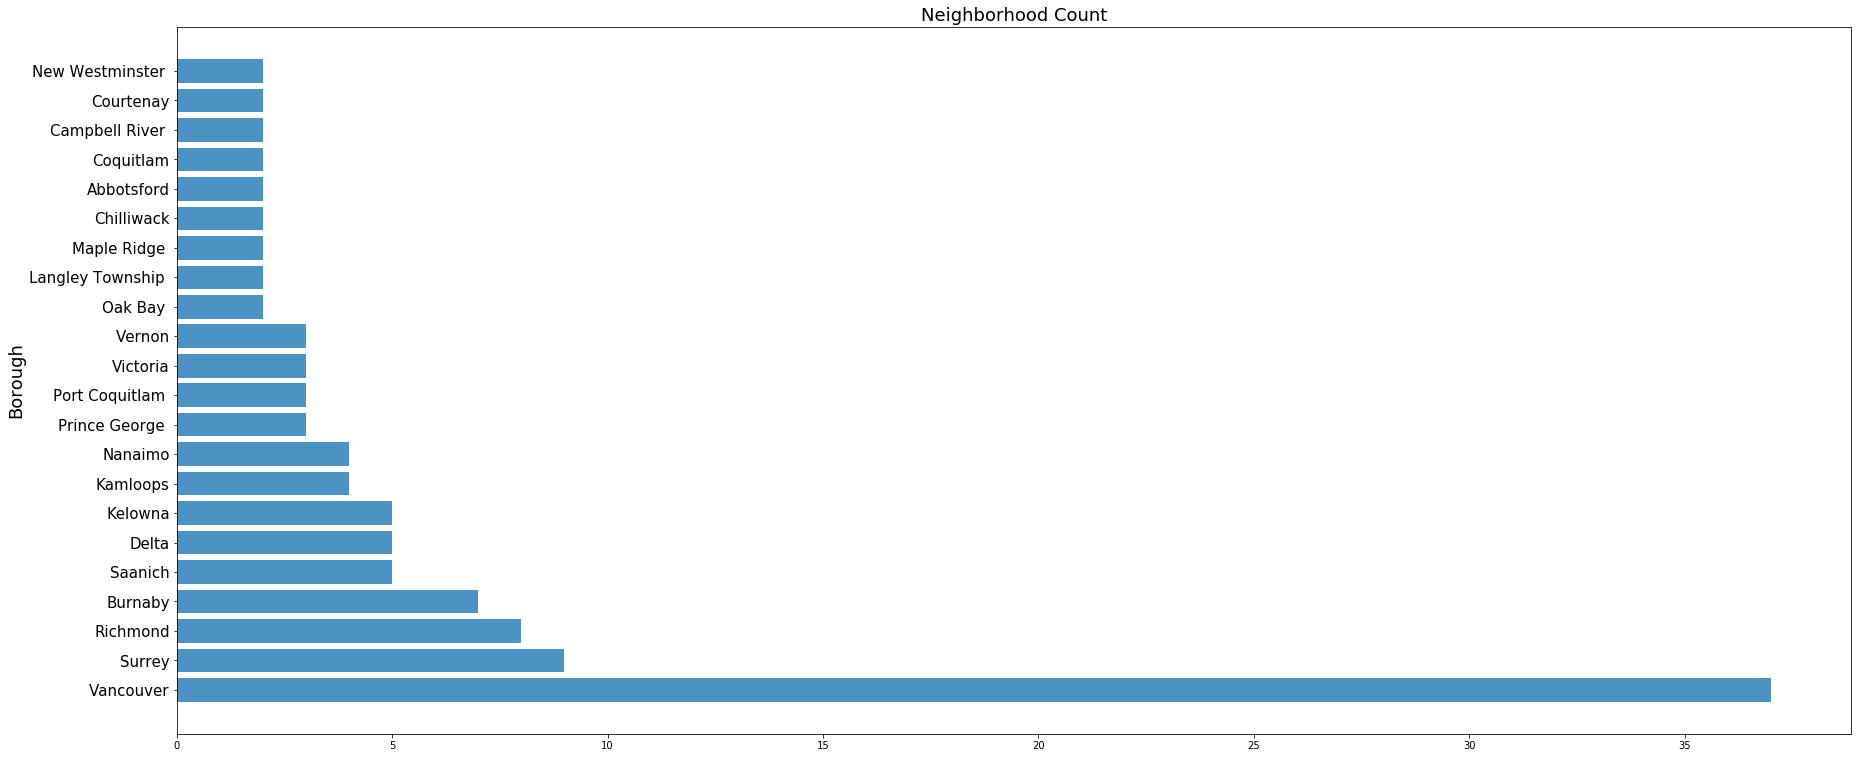

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pos = np.arange(len(featureSelect.index))

plt.figure(figsize=(30,13))
plt.barh(y_pos,featureSelect.tolist() , align='center', alpha=0.8)
plt.yticks(y_pos, featureSelect.index, fontsize=15)
plt.ylabel('Borough', fontsize=18)
plt.title('Neighborhood Count',fontsize=18)

plt.show()

## Feature Selection:
We decided to narrow down our analysis to vancouver, lets filter out our features for further analysis.

In [52]:
#mylocation=['Surrey','Delta', 'Vancouver' ]
mylocation=['Vancouver']

my_neighbor = neighborhoodDF.loc[neighborhoodDF['Borough'].isin(mylocation)]
my_neighbor

,PostalCode,Borough,Neighborhood,latitude,longitude
86,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04
87,V5L,Vancouver,Grandview-Woodlands,49.279,-123.067
90,V5P,Vancouver,SE Kensington,49.222,-123.068
91,V5R,Vancouver,Renfrew-Collingwood,49.24,-123.041
92,V5S,Vancouver,Killarney,49.218,-123.038
93,V5T,Vancouver,Mount Pleasant,49.262,-123.092
94,V5V,Vancouver,Kensington,49.248,-123.091
95,V5W,Vancouver,SE Riley Park-Little Mountain,49.233,-123.092
96,V5X,Vancouver,SE Oakridge,49.216,-123.098
98,V5Z,Vancouver,Fairview,49.248,-123.121


_Now that we have only vancouver data. Let's look at our neighbors on a map_

In [53]:
address = 'Burnaby'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Oak Bay, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Oak Bay, Canada are 49.2433804, -122.9725459.


In [54]:
map_bc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoodDF['latitude'], neighborhoodDF['longitude'], neighborhoodDF['Borough'], neighborhoodDF['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bc)  
    
map_bc

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those.

In [55]:
CLIENT_ID = '*****' # your Foursquare ID
CLIENT_SECRET = '*****' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Getting venues in Vancouver Neighborhood using FourSquare API

In [56]:
radius = 500
LIMIT = 100

venues = []

for lat, long, post, borough, neighborhood in zip(my_neighbor['latitude'], my_neighbor['longitude'], my_neighbor['PostalCode'], my_neighbor['Borough'], my_neighbor['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            post, 
            borough,
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [57]:
venues_df = pd.DataFrame(venues)
venues_df.columns = ['PostalCode', 'Borough', 'Neighborhood', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(venues_df.shape)
venues_df

(810, 9)


,PostalCode,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,The Fair at the PNE,49.282971,-123.042109,Fair
1,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,Wooden Roller Coaster,49.281744,-123.035128,Theme Park Ride / Attraction
2,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,Livestock Barns,49.284037,-123.039278,Farm
3,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,Playland,49.281924,-123.036258,Theme Park
4,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,Hastings Community Centre,49.280778,-123.039176,Event Space
5,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,PNE Amphitheatre,49.283777,-123.037242,Stadium
6,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,Plaza Beer Garden,49.283701,-123.038785,Beer Garden
7,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,Italia Bakery,49.280940,-123.045885,Bakery
8,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,Empire Fields,49.281870,-123.034135,Soccer Field
9,V5K,Vancouver,Hastings-Sunrise,49.281,-123.04,Subway,49.280892,-123.045732,Sandwich Place


_So now we have all the restaurants in area. This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal locations for a new Indian restaurant!_

## Methodology :
In this project we will direct our efforts on detecting areas of Vancouver that have low restaurant density.
In first step we have collected the required **data: location and type (category) of every restaurant in from Vancouver center**. We have also **identified Asian restaurants** (according to Foursquare categorization).

Second step in our analysis is exploration of different areas of Vancouver - we will calculate the count of each venue category in a given area, which gives us a basic understanding of the type of the area

In third and final step we will focus on most promising areas by creating **clusters of locations that are of similar type** : we will take into consideration locations with **no more than two restaurants**, and we want locations **without Indian restaurants**. We will present map of all such locations but also create clusters (using **k-means clustering**).

_Lets identify how many unique venue categories in the area_

In [58]:
print('There are {} unique venue categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 179 unique venue categories.


In [59]:
venues_df.groupby('VenueCategory').nunique()
plot_df= venues_df.groupby('VenueCategory').nunique()
plot_df

,PostalCode,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
VenueCategory,,,,,,,,,
Airport,1,1,1,1,1,1,1,1,1
Airport Terminal,2,1,2,2,1,2,2,2,1
American Restaurant,6,1,6,6,4,6,8,8,1
Amphitheater,1,1,1,1,1,1,1,1,1
Art Gallery,3,1,3,3,3,3,3,3,1
Asian Restaurant,6,1,6,6,6,8,8,8,1
Athletics & Sports,2,1,2,1,2,2,2,2,1
Australian Restaurant,1,1,1,1,1,1,1,1,1
Automotive Shop,1,1,1,1,1,1,1,1,1


In [63]:
#plot_df.Neighborhood.tolist()

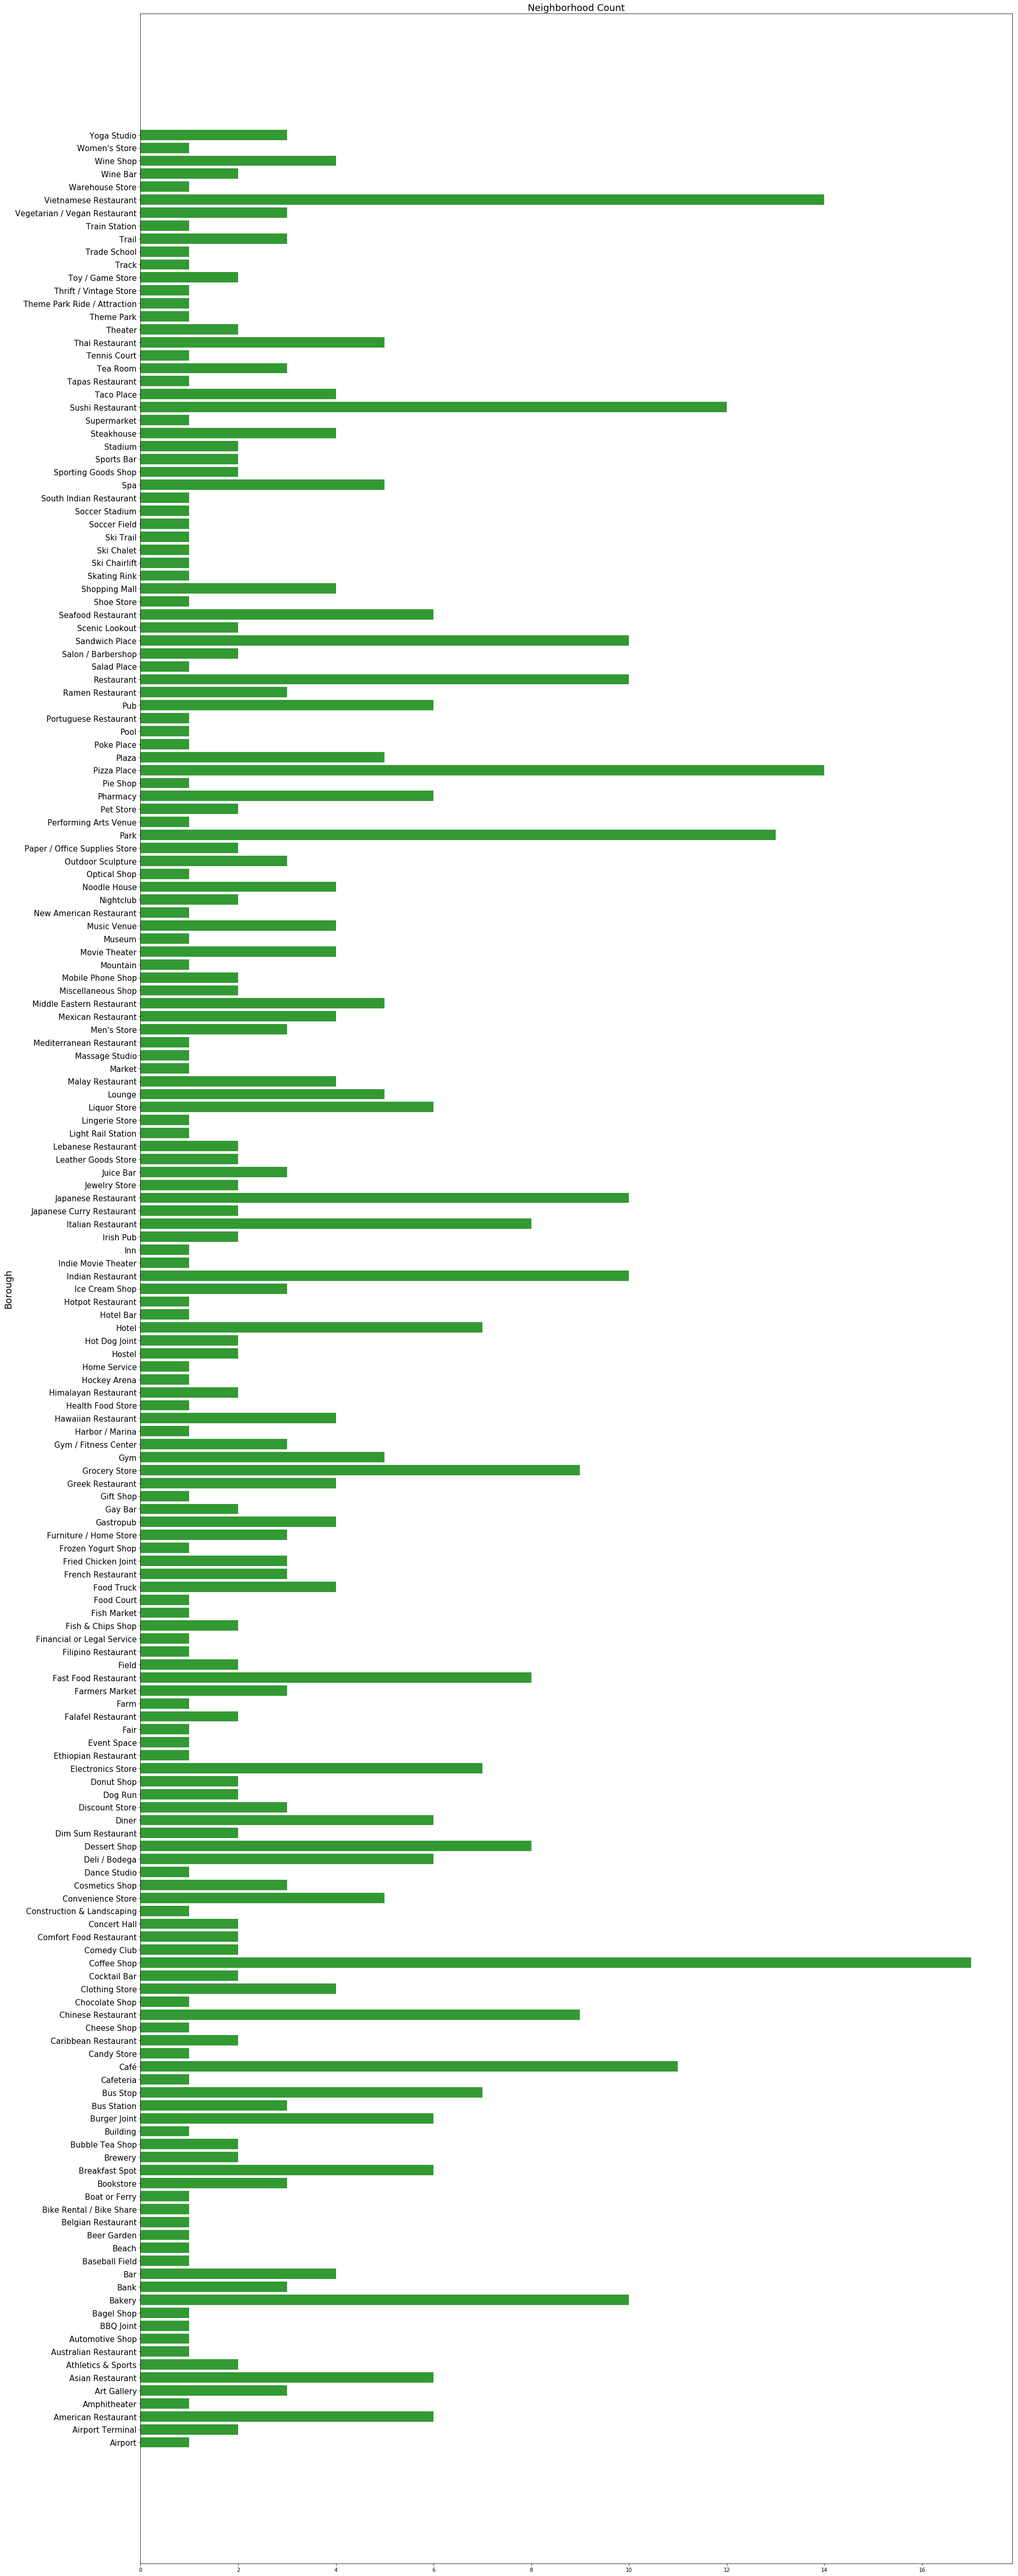

In [81]:
y_pos = np.arange(len(plot_df.index))

plt.figure(figsize=(30,90))
plt.barh(y_pos, height=0.8, width=plot_df.Neighborhood.tolist() , align='center', alpha=0.8, fc='green')
plt.yticks(y_pos, plot_df.index, fontsize=15)
plt.ylabel('Borough', fontsize=18)
plt.title('Neighborhood Count',fontsize=18)

plt.show()

Looks like there are a lot of Asian restraunts compared to American restraunts in vancouver, which gives us the idea that people here like Asian cuisine more. This makes it out perfect choice of location. Lets dig deep further and calculate the average number of time a particular venue category appears in each neighborhood

In [82]:
# one hot encoding
onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
onehot['Neighborhood'] = venues_df['Neighborhood'] 

# move neighbourhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.shape

(810, 180)

In [83]:
oneHotgrouped = onehot.groupby('Neighborhood').mean().reset_index()
oneHotgrouped

,Neighborhood,Airport,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,...,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bentall Centre,0.1,0.20,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Central Kitsilano,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.054054,0.027027,0.000000,0.000000,0.027027,0.00,0.054054
2,Chaldecutt,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Dunbar-Southlands,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.00,0.000000
4,End,0.0,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,0.010000,0.01,0.010000
5,Fairview,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.000000,0.045455,0.000000,0.000000,0.000000,0.00,0.000000
6,Grandview-Woodlands,0.0,0.00,0.000000,0.000000,0.000000,0.078947,0.026316,0.00,0.000000,...,0.000000,0.000000,0.00,0.026316,0.026316,0.000000,0.000000,0.000000,0.00,0.000000
7,Hastings-Sunrise,0.0,0.00,0.000000,0.041667,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.000000,0.041667,0.000000,0.000000,0.000000,0.00,0.000000
8,Kensington,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.000000,0.076923,0.000000,0.000000,0.000000,0.00,0.000000
9,Killarney,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


Great! now, let's calculate the most frequent venues in the area and narrow don our search to top 10 venues per neighborhood

In [84]:
# Get most frequent venues
def getTopVenues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:top_venues]

In [85]:
num_top_venues = 10

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    columns.append('Venue Rank-{}'.format(ind+1))

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['Neighborhood'] = oneHotgrouped['Neighborhood']

for ind in np.arange(oneHotgrouped.shape[0]):
    location_venues_sorted.iloc[ind, 1:] = getTopVenues(oneHotgrouped.iloc[ind, :], num_top_venues)

location_venues_sorted

,Neighborhood,Venue Rank-1,Venue Rank-2,Venue Rank-3,Venue Rank-4,Venue Rank-5,Venue Rank-6,Venue Rank-7,Venue Rank-8,Venue Rank-9,Venue Rank-10
0,Bentall Centre,Airport Terminal,Airport,Irish Pub,Outdoor Sculpture,Breakfast Spot,Gastropub,Gym,Plaza,American Restaurant,Event Space
1,Central Kitsilano,Coffee Shop,Pizza Place,Yoga Studio,Pub,Vegetarian / Vegan Restaurant,Italian Restaurant,Breakfast Spot,Café,Spa,Liquor Store
2,Chaldecutt,Park,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm
3,Dunbar-Southlands,Construction & Landscaping,Vietnamese Restaurant,Home Service,Fast Food Restaurant,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field
4,End,Japanese Restaurant,Coffee Shop,Hotel,Bakery,Italian Restaurant,Restaurant,Sushi Restaurant,Dessert Shop,Cosmetics Shop,Gay Bar
5,Fairview,Bus Stop,Coffee Shop,Chinese Restaurant,Sushi Restaurant,Bubble Tea Shop,Bank,Park,Restaurant,Shopping Mall,Café
6,Grandview-Woodlands,Asian Restaurant,Theater,Italian Restaurant,Grocery Store,Brewery,Coffee Shop,Sushi Restaurant,Pizza Place,Steakhouse,Breakfast Spot
7,Hastings-Sunrise,Theme Park Ride / Attraction,Beer Garden,Event Space,Theme Park,Stadium,Bus Station,Sandwich Place,Farm,Fair,Burger Joint
8,Kensington,Coffee Shop,Bus Stop,Chinese Restaurant,Vietnamese Restaurant,Ice Cream Shop,Supermarket,Grocery Store,Greek Restaurant,Malay Restaurant,Filipino Restaurant
9,Killarney,Chinese Restaurant,Bus Stop,Pharmacy,Bank,Farmers Market,Deli / Bodega,Mobile Phone Shop,Shopping Mall,Sushi Restaurant,Liquor Store


## Clustering using k-means into 5 clusters
Let's segregate our list of neighborhoods into similar clusters

In [86]:
backupNeighborhoodDF = oneHotgrouped
#backupNeighborhoodDF

In [87]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(.95)
oneHotgrouped_cluster = pca.fit_transform(oneHotgrouped.drop('Neighborhood', 1))

In [88]:
print(oneHotgrouped.shape, location_venues_sorted.shape)
uniqueNeighborhood=oneHotgrouped['Neighborhood'].tolist()
uniqueNeighborhood_LocationDF=my_neighbor[my_neighbor.Neighborhood.isin(uniqueNeighborhood)]
uniqueNeighborhood_LocationDF.shape

(32, 180) (32, 11)


(32, 5)

In [149]:
# run k-means clustering for 5 clusters
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(oneHotgrouped_cluster)
print(kmeans.labels_[:], kmeans.labels_.shape)

[1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 0 3 1] (32,)


In [150]:

myNeighborhood = oneHotgrouped.merge(uniqueNeighborhood_LocationDF, on = "Neighborhood", how = "left").dropna()
myNeighborhoodFinalDF = myNeighborhood.join(location_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#print(my_neighbor.shape, myNeighborhood.shape, oneHotgrouped.shape)
#print(kmeans.labels_+1)
myNeighborhoodFinalDF["Cluster Labels"] = kmeans.labels_ + 1
myNeighborhoodFinalDF
#myNeighborhood.shape

,Neighborhood,Airport,Airport Terminal,American Restaurant,Amphitheater,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,...,Venue Rank-2,Venue Rank-3,Venue Rank-4,Venue Rank-5,Venue Rank-6,Venue Rank-7,Venue Rank-8,Venue Rank-9,Venue Rank-10,Cluster Labels
0,Bentall Centre,0.1,0.20,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,Airport,Irish Pub,Outdoor Sculpture,Breakfast Spot,Gastropub,Gym,Plaza,American Restaurant,Event Space,2
1,Central Kitsilano,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,Pizza Place,Yoga Studio,Pub,Vegetarian / Vegan Restaurant,Italian Restaurant,Breakfast Spot,Café,Spa,Liquor Store,2
2,Chaldecutt,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm,1
3,Dunbar-Southlands,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,Vietnamese Restaurant,Home Service,Fast Food Restaurant,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,2
4,End,0.0,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,Coffee Shop,Hotel,Bakery,Italian Restaurant,Restaurant,Sushi Restaurant,Dessert Shop,Cosmetics Shop,Gay Bar,2
5,Fairview,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,Coffee Shop,Chinese Restaurant,Sushi Restaurant,Bubble Tea Shop,Bank,Park,Restaurant,Shopping Mall,Café,2
6,Grandview-Woodlands,0.0,0.00,0.000000,0.000000,0.000000,0.078947,0.026316,0.00,0.000000,...,Theater,Italian Restaurant,Grocery Store,Brewery,Coffee Shop,Sushi Restaurant,Pizza Place,Steakhouse,Breakfast Spot,2
7,Hastings-Sunrise,0.0,0.00,0.000000,0.041667,0.000000,0.000000,0.000000,0.00,0.000000,...,Beer Garden,Event Space,Theme Park,Stadium,Bus Station,Sandwich Place,Farm,Fair,Burger Joint,2
8,Kensington,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,Bus Stop,Chinese Restaurant,Vietnamese Restaurant,Ice Cream Shop,Supermarket,Grocery Store,Greek Restaurant,Malay Restaurant,Filipino Restaurant,2
9,Killarney,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,Bus Stop,Pharmacy,Bank,Farmers Market,Deli / Bodega,Mobile Phone Shop,Shopping Mall,Sushi Restaurant,Liquor Store,2


## Data Visualization: Let's plot the cluster into a map
Now that we have our clustered data, let's plot it on a map

In [152]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
%matplotlib inline

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters = kclusters + 1

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(myNeighborhoodFinalDF['latitude'],
                                  myNeighborhoodFinalDF['longitude'],
                                  myNeighborhoodFinalDF['Neighborhood'],
                                  myNeighborhoodFinalDF['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## Maximum Neighborhoods belong to Cluster 2 (Purple), Let's Analyse it:

_It looks like this cluster has a lively neighborhood has a lot of restaurant specially Chinese/Japanese restaurants. Opening a new Indian restaurant here would not be so great._

In [153]:
myNeighborhoodFinalDF.loc[myNeighborhoodFinalDF['Cluster Labels'] == 2].filter(["Cluster Labels","Borough","Neighborhood","latitude","longitude","Venue Rank-1","Venue Rank-2","Venue Rank-3","Venue Rank-4","Venue Rank-5","Venue Rank-6","Venue Rank-7","Venue Rank-8","Venue Rank-9","Venue Rank-10"])

,Cluster Labels,Borough,Neighborhood,latitude,longitude,Venue Rank-1,Venue Rank-2,Venue Rank-3,Venue Rank-4,Venue Rank-5,Venue Rank-6,Venue Rank-7,Venue Rank-8,Venue Rank-9,Venue Rank-10
0,2,Vancouver,Bentall Centre,49.293,-123.116,Airport Terminal,Airport,Irish Pub,Outdoor Sculpture,Breakfast Spot,Gastropub,Gym,Plaza,American Restaurant,Event Space
1,2,Vancouver,Central Kitsilano,49.265,-123.165,Coffee Shop,Pizza Place,Yoga Studio,Pub,Vegetarian / Vegan Restaurant,Italian Restaurant,Breakfast Spot,Café,Spa,Liquor Store
3,2,Vancouver,Dunbar-Southlands,49.23,-123.189,Construction & Landscaping,Vietnamese Restaurant,Home Service,Fast Food Restaurant,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field
4,2,Vancouver,End,49.283,-123.13,Japanese Restaurant,Coffee Shop,Hotel,Bakery,Italian Restaurant,Restaurant,Sushi Restaurant,Dessert Shop,Cosmetics Shop,Gay Bar
5,2,Vancouver,Fairview,49.248,-123.121,Bus Stop,Coffee Shop,Chinese Restaurant,Sushi Restaurant,Bubble Tea Shop,Bank,Park,Restaurant,Shopping Mall,Café
6,2,Vancouver,Grandview-Woodlands,49.279,-123.067,Asian Restaurant,Theater,Italian Restaurant,Grocery Store,Brewery,Coffee Shop,Sushi Restaurant,Pizza Place,Steakhouse,Breakfast Spot
7,2,Vancouver,Hastings-Sunrise,49.281,-123.04,Theme Park Ride / Attraction,Beer Garden,Event Space,Theme Park,Stadium,Bus Station,Sandwich Place,Farm,Fair,Burger Joint
8,2,Vancouver,Kensington,49.248,-123.091,Coffee Shop,Bus Stop,Chinese Restaurant,Vietnamese Restaurant,Ice Cream Shop,Supermarket,Grocery Store,Greek Restaurant,Malay Restaurant,Filipino Restaurant
9,2,Vancouver,Killarney,49.218,-123.038,Chinese Restaurant,Bus Stop,Pharmacy,Bank,Farmers Market,Deli / Bodega,Mobile Phone Shop,Shopping Mall,Sushi Restaurant,Liquor Store
11,2,Vancouver,Mount Pleasant,49.262,-123.092,Sushi Restaurant,Hotel,Vietnamese Restaurant,Grocery Store,Ethiopian Restaurant,Convenience Store,Bar,Market,Liquor Store,Park


_This cluster too has a lot of restaurant specially Asian restaurants. Opening a new Indian restaurant here would not be so great here too._

## If we analyze other clusters i.e. 1-Red, 3-Cyan, 4-Sky

_This cluster does't have any Asian restraunt. Considering people like asian food here and the area is in close vicinity from cluster 2 it would be a good place to start an Indian restraunt bisuness here._

In [156]:
myNeighborhoodFinalDF.loc[myNeighborhoodFinalDF['Cluster Labels'].isin([1,3,4]) ]\
.filter(["Cluster Labels","Borough","Neighborhood","latitude","longitude","Venue Rank-1","Venue Rank-2","Venue Rank-3","Venue Rank-4","Venue Rank-5","Venue Rank-6","Venue Rank-7","Venue Rank-8","Venue Rank-9","Venue Rank-10"]).sort_values(by='Cluster Labels')

,Cluster Labels,Borough,Neighborhood,latitude,longitude,Venue Rank-1,Venue Rank-2,Venue Rank-3,Venue Rank-4,Venue Rank-5,Venue Rank-6,Venue Rank-7,Venue Rank-8,Venue Rank-9,Venue Rank-10
2,1,Vancouver,Chaldecutt,49.249,-123.209,Park,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm
10,1,Vancouver,Kitsilano,49.267,-123.198,Park,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market,Farm
29,1,Vancouver,Vancouver Southwest Central,49.322,-123.083,Park,Baseball Field,Yoga Studio,Falafel Restaurant,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant
26,3,Vancouver,Vancouver South,49.34,-123.191,Art Gallery,Yoga Studio,Fair,Fish Market,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market
25,4,Vancouver,Vancouver Northwest Central,49.35,-123.068,Trail,Paper / Office Supplies Store,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market
30,4,Vancouver,Vancouver West,49.361,-123.263,Tapas Restaurant,Trail,Yoga Studio,Fair,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market


## Result and Discussion

Our analysis shows that although there is a great number of restaurants in Vancouver, there are areas of low restaurant density fairly close to city center. Highest concentration of restaurants was concentrated in cluster Purple.
After directing our attention to this more narrow area of interest to cluster Red, Sky and Cyan, we find a low density of restraunts.

Considering people like asian food here and the area is in close vicinity from cluster Purple it would be a good place to start an Indian restraunt bisuness here

## Conclusion

Purpose of this project was to identify British Coulmbia areas close to center with low number of restaurants in order to narrow down the search for optimal location for a new Indian restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis (Vancouver), and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.